__Ejercicio 3:__ Implementar método de Simpson de la misma forma que el ejercicio anterior(__Ejercicio 1__: Implementar el método de integración del rectángulo. Deberán construir una _rutina_ que reciba una función y el tamaño de la diferencia finita, y devuelva el valor aproximado de la integral. Para hacer esto deberán dividir el intervalo de integración en segmentos pequeños y aplicar la formula de arriba.

Ejemplos: 
`rectangulo(f,a,b,h)`, donde $h=(b-a)/n$, 
`rectangulo(f,a,b,n)` o 
`rectangulo(f,b)` donde `b=linspace(a,b,n)`.)

In [1]:
using SymPy
using PyPlot

In [2]:
x=symbols("x")

x

# Regla de Simpson
## $\int _{a}^{b}f(x)\,dx\approx {\frac {b-a}{3n}}{\bigg [}f(a)+2\sum _{j=1}^{(n/2)-1}f(2j\frac{b-a}{n})+4\sum _{j=1}^{n/2}f((2j-1)\frac{b-a}{n})+f(b){\bigg ]}$

In [3]:
function simpson(F,region)
    x=Sym("x");
    G=F(x); #Nos aseguramos que la función que recibe es simbólica
    f=lambdify(G,[x]); #Transformamos la función a una función genérica para hacer cálculos rápidos
    n=length(region); #se define el número de subintervalos
    a=region[1]; #límite inferior de la región
    b=region[n]; #límite superior de la región
    sum=0;
    part=(b-a)/n; #se define el tamaño de cada subintervalo
    for i in 2:n-1
        if (i%2==0)
            sum=sum+2*f(a+i*part); #hace la suma de los pares $2\sum _{j=1}^{(n/2)-1}f(2j\frac{b-a}{n})$
        elseif(i%2!=0)
            sum=sum+4*f(a+i*part); #hace la suma de los impares $4\sum _{j=1}^{n/2}f((2j-1)\frac{b-a}{n})$
        end
    end
    return (sum+f(a)+f(b))*part/3
end

simpson (generic function with 1 method)

In [4]:
f(y)=y^2;

In [5]:
simpson(f,linspace(0,3,1000))

  likely near In[5]:1
  likely near In[5]:1
  likely near In[5]:1
in jprint at /home/juser/.julia/v0.6/SymPy/src/display.jl


8.999999964000006

In [6]:
simpson(x^2,linspace(0,3,1000))

8.999999964000006

__Ejercicio 4:__ Implementar método de interpolación de Lagrange en `Julia`. La función deberá recibir la lista de puntos $(x_k,y_k)$ y el _lugar donde evaluamos el polinomio_, note que es particularmente útil si los _inputs_ son las listas de las $x$'s y de las $y$'s separadamente, es decir, de la misma forma en como la función `plot` recibe los argumentos; esto servira para verificar nuestros resultados. EJ.: `Interpolador(listx,listy,x)`.
* Interpole las funciones $\cos(x)$, $\cos^2(x)$ tomando un arreglo de $10$ puntos distribuidos uniformemente dentro del dominio $[0,2 \pi]$, donde el primer punto sea $0$ y el último $2\pi$. Grafique los puntos a interpolar y la funcion interpoladora.
* Interpole los los siguientes puntos: `[(0,10),(2,-10),(3,-4),(4,0),(5,5),(6,20),(7,-1)]`.Grafique los puntos a interpolar y la funcion interpoladora.
* Para los ejercicios anteriores evalue la función que interpola en una variable simbólica, para que nos permita ver la forma explicita del polinomio. Ej: `Interpolador(listx,listy,Sym("x"))`. 

__Tip:__ Pueden hacer separadamente la rutina para $l_j(x)$, luego la de $L(x)$ utilizando la rutina que ya tenemos para $l_j(x)$. Por Ej: `funciondelabase(j,listx,x)`, donde $x$ es el lugar donde evaluamos la función interpoladora.

In [7]:
function baseL(listx,j) #j-ésima base del polinomio
    n=length(listx); #como resultado un polinomio de grado n-1
    prod=1;
    x=Sym("x");
    #t=[];
    #for j in 1:n
        for i in 1:n
        if(j!=i )
                prod=prod*(x-listx[i])/(listx[j]-listx[i]);
        end
        end
        return prod
    #push!(t,prod);
    #prod=1;
    #end
    #return t
end
        

baseL (generic function with 1 method)

In [8]:
function PL(listx,listy)
    if(length(listx)==length(listy))
        n=length(listx);
        sum=0;
        for k in 1:n
            sum=sum+listy[k]*baseL(listx,k);
        end
        return simplify(sum)
    end
end

PL (generic function with 1 method)

In [9]:
PL([1,2,3],[2,5,3])

     2           
  5*x    21*x    
- ---- + ---- - 6
   2      2      

In [10]:
function polinomio(listx,listy,x0)
    P=simplify(PL(listx,listy));
    p=lambdify(P,[x]);
    return p(x),p(x0)
end

polinomio (generic function with 1 method)

In [11]:
polinomio([1,2,3],[2,5,3],0)

(-5*x^2/2 + 21*x/2 - 6, -6.0)

In [12]:
listy1=cos.(linspace(0,pi,10));

In [13]:
coseno=PL(linspace(0,pi,10),listy1);

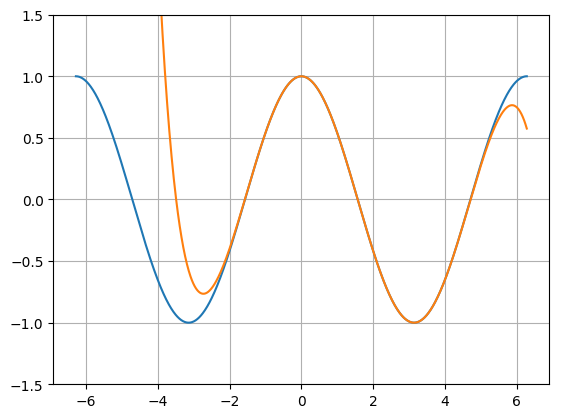

In [14]:
x1=linspace(-2*pi,2*pi,1000)
y1=cos.(x1)
y2=coseno.(x1)
plot(x1,y1)
plot(x1,y2)
ylim(-1.5,1.5)
grid("on")

In [15]:
coseno(x)

                       9                        8                        7    
- 2.63252636208827e-6*x  + 3.72164646568196e-5*x  - 3.56235990457421e-5*x  - 0

                    6                        5                       4        
.00132241972585589*x  - 8.20565539569884e-5*x  + 0.0417327208594802*x  - 3.298

                3                      2                              
40690964645e-5*x  - 0.499990868075997*x  - 1.04713495108211e-6*x + 1.0

In [16]:
listx2=zeros(7);
listy2=zeros(7);
for i in 1:7
    listx2[i]=[(0,10),(2,-10),(3,-4),(4,0),(5,5),(6,20),(7,-1)][i][1]
    listy2[i]=[(0,10),(2,-10),(3,-4),(4,0),(5,5),(6,20),(7,-1)][i][2]
end
return listx2,listy2

([0.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0], [10.0, -10.0, -4.0, 0.0, 5.0, 20.0, -1.0])

In [17]:
p2=lambdify(PL(listx2,listy2),[x]);

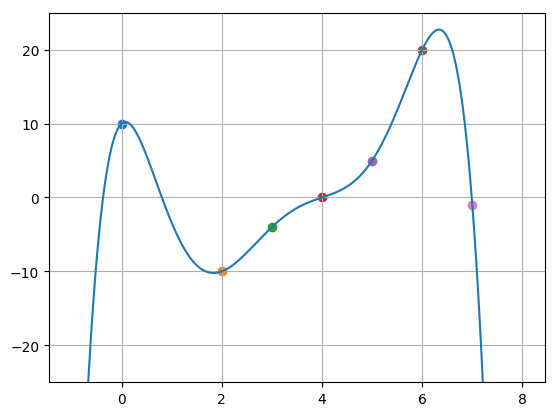

In [18]:
x2=linspace(-1,8,1000)
y3=p2.(x2)
plot(x2,y3)
for i in 1:7
    scatter(listx2[i],listy2[i])
end
ylim(-25,25)
grid("on")

In [19]:
p2(x)

                      6                    5                     4            
- 0.0686507936507937*x  + 1.3452380952381*x  - 9.83531746031746*x  + 32.511904

         3                     2                            
7619048*x  - 43.3103174603175*x  + 5.92857142857141*x + 10.0

__Ejercicio 5:__ Comparen como convergen los métodos al valor exacto de la integral, respeco al ancho de las celdas, háganlo para $f(x)=-\sin(x)$, integrando en el intervalo $[0,2\pi]$. Es decir, para los tres métodos fijen el ancho de la celda y haganla cada vez mas pequeña, grafiquen el valor de la integral contra el inverso del acho de la celda, es decir $\int f(x) dx$ contra $1/\Delta x$. Hagan esto para los tres métodos y ponganlo en una gráfica y comenten lo que observan.]

In [20]:
function rectangulo(F,region)
    x=Sym("x");
    G=F(x); #Nos aseguramos que la función que recibe es simbólica
    f=lambdify(G,[x]); #Transformamos la función a una función genérica para hacer cálculos rápidos
    n=length(region); #se define el número de subintervalos
    a=region[1]; #límite inferior de la región
    b=region[n]; #límite superior de la región
    sum=0;
    part=(b-a)/n; #se define el tamaño de cada subintervalo
    for i in 0:n
        sum=sum+f.(a+part*(2i-1)/2)*part; #(2i-1)/2 asegura que se toma el valor a la mitad del subintervalo
    end
    return sum
end

rectangulo (generic function with 1 method)

In [21]:
function trapecio(F,region)
     x=Sym("x");
    G=F(x); #Nos aseguramos que la función que recibe es simbólica
    f=lambdify(G,[x]); #Transformamos la función a una función genérica para hacer cálculos rápidos
    n=length(region); #se define el número de subintervalos
    a=region[1]; #límite inferior de la región
    b=region[n]; #límite superior de la región
    sum=0;
    part=(b-a)/n; #se define el tamaño de cada subintervalo
    for i in 1:(n-1)
        sum= sum + f(a+i*part)
    end
    return part*(((f(a)+f(b))/2)+sum)
end

trapecio (generic function with 1 method)

In [22]:
rectangulo(-sin(x),linspace(0,2*pi,2)),
trapecio(-sin(x),linspace(0,2*pi,2)),
simpson(-sin(x),linspace(0,2*pi,2))

(3.141592653589793, 0.0, 2.5648942582957195e-16)

In [23]:
g(x)=-sin(x) #Se elige la función que se desea aproximar por todos los métodos
n=0.00;
list1=zeros(100)
list2=zeros(100)
list3=zeros(100)
listx=zeros(100)
for i in 1:100 #hace una lista con la convergencia de cada método
    listx[i]=1/2+n
    list1[i]=rectangulo(g(x),linspace(0,2*pi,2+n))
    list2[i]=trapecio(g(x),linspace(0,2*pi,2+n))
    list3[i]=simpson(g(x),linspace(0,2*pi,2+n))
    n=n+2;
end
return 

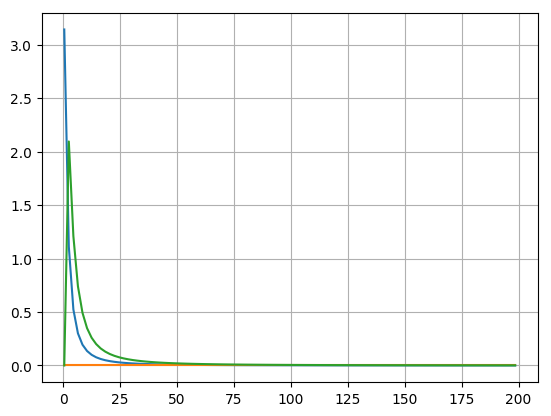

In [24]:
plot(listx,list1) #este es el azul
plot(listx,list2) #este es el naranja
plot(listx,list3) #este es el verde
grid("on")


Como $-sin(x)$ es impar y de periodo $2\pi$ el método del trapecio toma areas simétricas que se cancelan una a una y por eso converge rápidamente al velor cero.